In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#from random import random, seed

In [2]:
#seed(8765309)

In [3]:
A = np.array([[-3,1.5,0],
              [2.1,-1,0.14],
              [0,1,-8]])

Ad = np.array([[2.1,1,2.4],
               [3.2,0,1],
               [0.7,0,0]])

B = np.array([[1],
              [0],
              [0]])

C = np.array([[0,1,0],
              [0,0,1]])

D = np.array([[0.1],
              [0.5],
              [3]])

F = np.array([1,0,0])

G = np.array([[0.00540540540540541, 0.0324324324324324]])

H = 1

N = -3.01135135135135

Nd = 2.06

J = np.array([1.45669539810080, 0.161037253469686])

Jd = np.array([1.01113513513514, 2.46140540540541])

In [4]:
R = np.dot(G,C)
RA = np.dot(R,A)
RAd = np.dot(R,Ad);
RB = np.dot(R,B)
RD = np.dot(R,D)
NR = np.dot(N,R)
NdR = np.dot(Nd,R)
JC = np.dot(J,C)
JdC = np.dot(Jd,C)

In [5]:
t = np.arange(0,20, 0.001)

In [6]:
np.shape(t)

(20000,)

In [7]:
simLen = np.shape(t)[0]

In [8]:
simLen

20000

In [9]:
tau = 1000

In [10]:
x = np.zeros((3, simLen))
xdot = np.zeros((3, simLen))
x[0,0:tau+1] = 1
x[1,0:tau+1] = 0.4
x[2,0:tau+1] = 2

In [11]:
zhat = np.zeros((1, simLen))
zhdot = np.zeros((1, simLen))
u = 1
#np.random.seed(seed=1000)

In [12]:
for i in range(tau, simLen):
    xdot[:,i]= (np.dot(A, (x[:,i]).reshape(3,1)) + np.dot(Ad, (x[:, i-tau]).reshape(3,1)) + B*u + D*(np.random.randint(5))).reshape(3,)
    if (i != simLen-1):
        x[:,i+1] = x[:,i] + 0.001*xdot[:,i]

In [13]:
y = np.dot(C,x)
print(np.shape(y))

(2, 20000)


In [14]:
for i in range(tau, simLen):
    zhdot[:,i] = (np.dot(N, (zhat[:,i])) + np.dot(Nd, (zhat[:,i-tau])) + np.dot((JC + RA - NR), (x[:, i])) + np.dot((JdC + RAd - NdR), (x[:, i-tau])) + (H + RB)*u + RD*(np.random.randint(5)))
    if (i != simLen - 1):
        zhat[:,i+1] = zhat[:,i] + 0.001*zhdot[:,i]

In [15]:
z = np.dot(F, x)#.reshape(1, 20000)

In [16]:
print(np.shape(z))
print(np.shape(x))
print(np.shape(zhat))
print(np.shape(t))
#t.reshape(1,20000)
z = z.reshape(1, 20000)
print(z.shape)

(20000,)
(3, 20000)
(1, 20000)
(20000,)
(1, 20000)


In [17]:
e = np.abs(zhat - z)

In [18]:
z == x[0,:]

array([[ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [19]:
#fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig1 = plt.figure(figsize=(7, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
fig1.text(0.43, 0.01, 'time (s)', ha='center', va='center')
#fig1.text(0.0, 0.55, 'Magnitude', ha='center', va='center', rotation='vertical')
ax1.set_title('Example 2: state and estimate dynamics')
ax2.set_title('error convergence')


line1, = ax1.plot(t[:], z[0, :], 'b-', linewidth=1.5, label='$x_1(t)$')
line2, = ax1.plot(t[:], zhat[0, :], 'r--', linewidth=1.5, label='$\hat{z}(t)$')
line1.set_antialiased(True)
line2.set_antialiased(True)
#ax1.set_ylim(0, 1.5)

ax1.legend(handles=[line1, line2], loc='upper right')

errline, = ax2.plot(t[0:], e[0, 0:],'g-', linewidth=1.5, label='$e(t)$')
errline.set_antialiased(True)
plt.ylim(0, 1.0)
ax2.legend(handles=[errline], loc='upper right')


In [20]:
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.5)

In [21]:
plt.savefig('puilfo_internally_positive_system.eps', figsize=(7, 10), dpi=600, bbox_inches='tight')

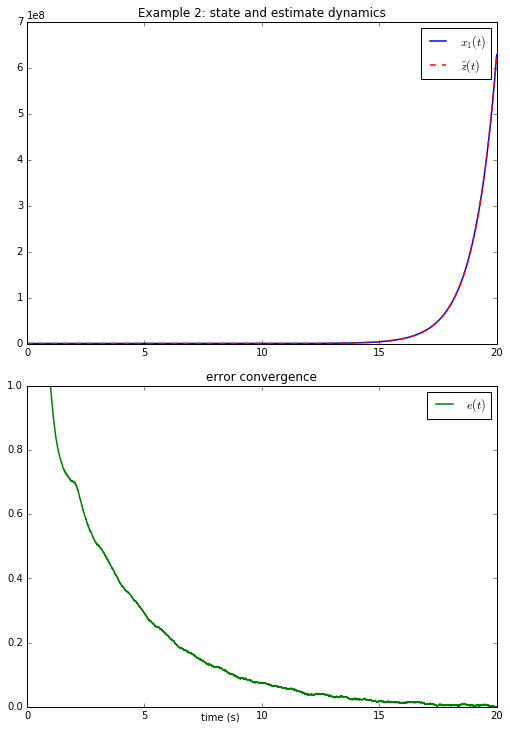

In [22]:
plt.show()

In [23]:
plt.plot(t, e[0,:])

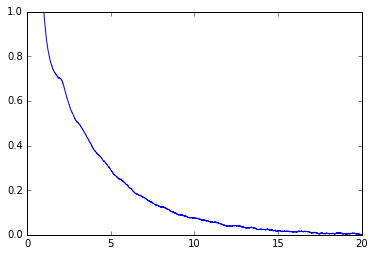

In [24]:
plt.show()

In [25]:
e = abs(zhat - z)
print(zhat.shape)
print(e.shape)

(1, 20000)
(1, 20000)


In [26]:
print(e)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   6.44207001e-04
    6.51955605e-04   6.59823418e-04]]


In [27]:
zhat[0, -1]

628843779.13768399